# Modeling a roulette wheel in vanilla Python

The first thing to do is model the possible results.  The places where the ball can settle are called "pockets."  American roulette has two green pockets call "0" and "00."  I'm going to lazily label the double zero pocket as -1 for now.  The rest of the pockets are evenly (though irregularly) divided between red and black.

In [22]:
POCKETS =(
    (-1, 'green'),
    (0, 'green'),
    (1, 'red'),
    (2, 'black'),
    (3, 'red'),
    (4, 'black'),
    (5, 'red'),
    (6, 'black'),
    (7, 'red'),
    (8, 'black'),
    (9, 'red'),
    (10, 'black'),
    (11, 'black'),
    (12, 'red'),
    (13, 'black'),
    (14, 'red'),
    (15, 'black'),
    (16, 'red'),
    (17, 'black'),
    (18, 'red'),
    (19, 'red'),
    (20, 'black'),
    (21, 'red'),
    (22, 'black'),
    (23, 'red'),
    (24, 'black'),
    (25, 'red'),
    (26, 'black'),
    (27, 'red'),
    (28, 'black'),
    (29, 'black'),
    (30, 'red'),
    (31, 'black'),
    (32, 'red'),
    (33, 'black'),
    (34, 'red'),
    (35, 'black'),
    (36, 'red'))

We'll use the `choice()` function from Python's standard library to simulate the ball landing in a random pocket each round.

In [23]:
from random import choice

Here's an example of calling `random.choice()` with the `POCKETS` we defined above.

In [24]:
display(choice(POCKETS))

(21, 'red')

Let's make sure that the results of calling `choice(POCKETS)` repeatedly looks like we'd expect.  We expect each possible result to be equally likely.  We can add up the frequencies of lots of objects using `collections.Counter()`

In [25]:
from collections import Counter

In [26]:
million_spins = tuple(choice(POCKETS) for _ in range(1_000_000))
million_spin_frequencies = sorted(Counter(million_spins).most_common())
print("Pocket\tFrequency")
for pocket in million_spin_frequencies:
    print(f"{pocket[0][0]}\t{pocket[1]:,g}")

Pocket	Frequency
-1	26,501
0	26,399
1	26,547
2	26,181
3	26,618
4	26,334
5	26,382
6	26,592
7	26,321
8	26,245
9	26,324
10	26,483
11	26,329
12	26,374
13	26,246
14	26,202
15	26,167
16	26,359
17	26,122
18	26,443
19	26,020
20	26,285
21	26,560
22	26,436
23	26,275
24	26,334
25	26,434
26	26,150
27	26,216
28	25,972
29	26,347
30	26,373
31	26,151
32	26,077
33	26,119
34	26,407
35	26,381
36	26,294


The table's a bit long, perhaps a graph?

In [27]:
import matplotlib.pyplot as plt

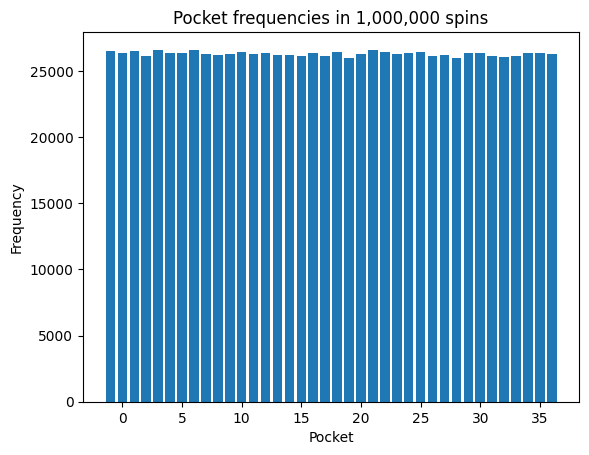

In [29]:
fig, ax = plt.subplots()
ax.bar([pocket[0][0] for pocket in million_spin_frequencies], [pocket[1] for pocket in million_spin_frequencies])
ax.set_title("Pocket frequencies in 1,000,000 spins")
ax.set_xlabel("Pocket")
ax.set_ylabel("Frequency")
plt.show()

That seems relatively uniform to me.

The next step is to model some bets, meaning a function that return true if they win and the payout if they do.

The final step is to model different betting strategies and graph the results.